In [36]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

## **Data Analysis**

In [37]:
# load data
data = pd.read_csv("../dataset/breast_cancer.csv")
data.drop('id', axis=1, inplace=True)    # remove the 'Id' column
data.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [38]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


There are 357 benign instances, and 212 malignant instances.


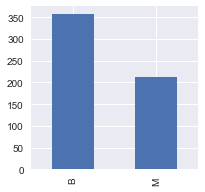

In [39]:
YCounts = data['diagnosis'].value_counts()
print("There are {0} benign instances, and {1} malignant instances.".format(YCounts[0], YCounts[1]))
YCounts.plot(kind='bar', figsize=(3,3))

### **Data Processing**

In [40]:
# split dataset into training set and test set
train, test = train_test_split(data, test_size = 0.3)
print("There are {} instances in the training set.".format(train.shape[0]))
print("There are {} instances in the testing set.".format(test.shape[0]))

There are 398 instances in the training set.
There are 171 instances in the testing set.


In [41]:
featureSize = train.shape[1] - 1;
XTrain = train.iloc[:,1:31]    # features
YTrain = train.iloc[:,0]    # label

XTest = test.iloc[:,1:31]    # features
YTest = test.iloc[:,0]    # label

### Feature Selection (feature correlations)

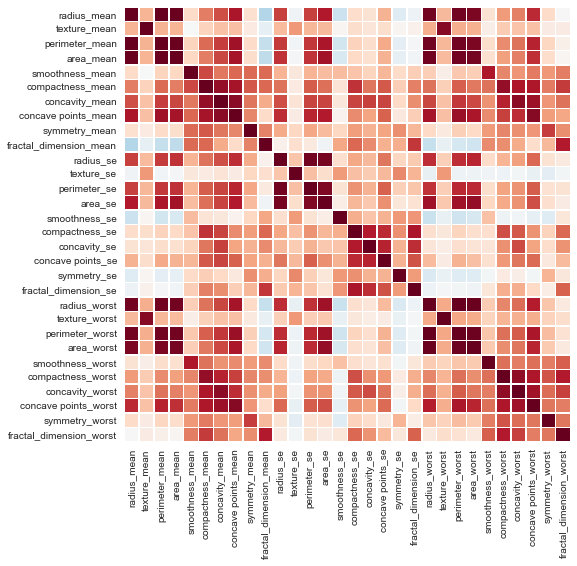

In [42]:
featureCorr = XTrain.corr()    # correlation between features
plt.subplots(figsize=(8,8))
# print(featureCorr.columns)
sns.heatmap(featureCorr, annot=False, fmt='.2f', linecolor='white', linewidths=0.5, cbar=False)

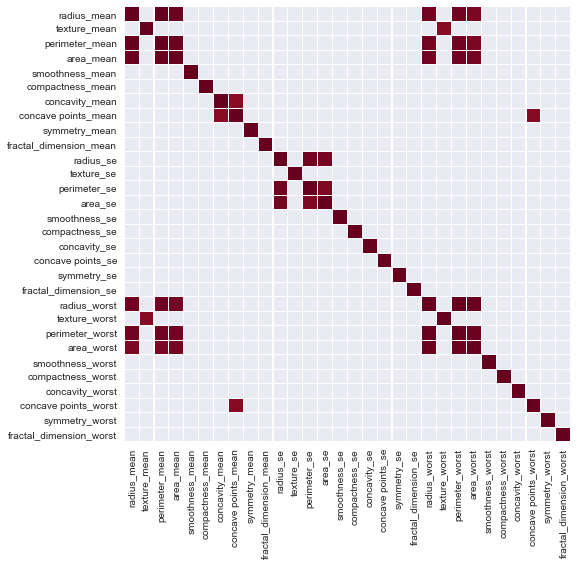

In [43]:
plt.subplots(figsize=(8,8))
mask = featureCorr < 0.9
sns.heatmap(featureCorr, annot=False, fmt='.2f', linecolor='white', linewidths=0.1, cbar=False, mask=mask)

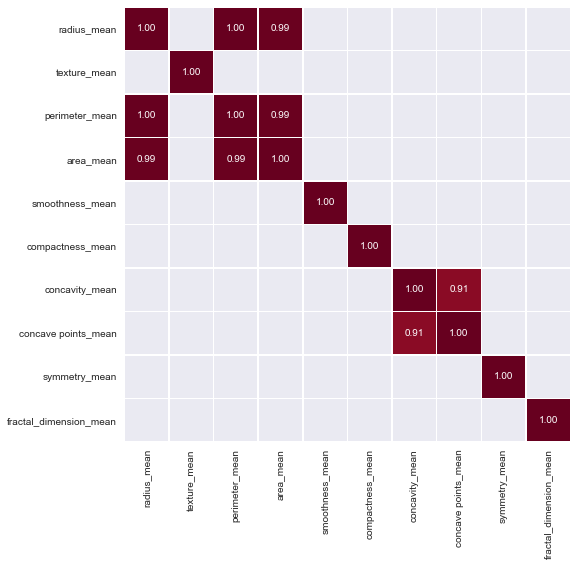

In [44]:
plt.subplots(figsize=(8,8))
mask = featureCorr.iloc[0:10,0:10] < 0.9
sns.heatmap(featureCorr.iloc[0:10,0:10], annot=True, fmt='.2f', linecolor='white', linewidths=0.5, cbar=False, mask=mask)

In [45]:
# high correlation feature groups: 
# (radius_mean, perimeter_mean, area_mean, radius_worst, perimeter_worst, area_worst)
# (concavity_mean, concave points_mean)
# (concave points_mean, concave points_worst)
# (radius_se, perimeter_se, area_se)
featureList = XTrain.columns
featureIgnored = ["radius_mean", "perimeter_mean", "area_mean", "perimeter_worst", "area_worst", "concave points_mean", "perimeter_se", "area_se"]
featureSelectedCol = [f for f in featureList if f not in featureIgnored]
print("selected features: {}.".format(featureSelectedCol))
# len(featureSelectedCol)

selected features: ['texture_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'].


### Random Forest

In [46]:
# train with all features
rf = RandomForestClassifier()
rf.fit(XTrain, YTrain)
YPredictRFTest = rf.predict(XTest)
print ("Accuracy of Random Forest (trained with all features) on testing set is {0:.2f}."
       .format(metrics.accuracy_score(YTest, YPredictRFTest)))

print("Confusion Matrix: {}".format(metrics.confusion_matrix(YTest, YPredictRFTest)))   
print("Recall: {0:.2f}".format(metrics.recall_score(YTest, YPredictRFTest, pos_label='M')))

Accuracy of Random Forest (trained with all features) on testing set is 0.97.
Confusion Matrix: [[103   1]
 [  4  63]]
Recall: 0.94


In [47]:
# get feature importance list in descending order
featureImportanceList = pd.Series(rf.feature_importances_, index=XTrain.columns).sort_values(ascending=False)
print("feature importance list in descending order:\n{}".format(featureImportanceList))

feature importance list in descending order:
concave points_mean        0.220268
perimeter_worst            0.173984
radius_worst               0.124229
area_se                    0.068210
concavity_mean             0.057491
area_worst                 0.054269
concave points_worst       0.044609
compactness_worst          0.041339
symmetry_worst             0.031949
concavity_worst            0.028725
perimeter_mean             0.027694
texture_mean               0.016582
smoothness_worst           0.014770
concave points_se          0.013243
texture_worst              0.009483
smoothness_mean            0.007871
area_mean                  0.007153
symmetry_se                0.006976
symmetry_mean              0.006779
fractal_dimension_se       0.006746
perimeter_se               0.006610
fractal_dimension_worst    0.005609
concavity_se               0.005539
compactness_se             0.004470
radius_se                  0.004409
texture_se                 0.003558
compactness_mean   

In [48]:
# feature selected with random forest
featureSelectedRF = list(featureImportanceList[:10].index)    #######################TODO
print("Top 10 important features selected by Random Forest:\n{}".format(featureSelectedRF))

Top 10 important features selected by Random Forest:
['concave points_mean', 'perimeter_worst', 'radius_worst', 'area_se', 'concavity_mean', 'area_worst', 'concave points_worst', 'compactness_worst', 'symmetry_worst', 'concavity_worst']


In [49]:
# train with features selected by correlation
rf2 = RandomForestClassifier()
rf2.fit(XTrain[featureSelectedCol], YTrain)
YPredictRFTest2 = rf2.predict(XTest[featureSelectedCol])
print ("Accuracy of Random Forest on testing set is {0:.2f}."
       .format(metrics.accuracy_score(YTest, YPredictRFTest2)))

print("Confusion Matrix: {}".format(metrics.confusion_matrix(YTest, YPredictRFTest2)))   
print("Recall: {0:.2f}".format(metrics.recall_score(YTest, YPredictRFTest2, pos_label='M')))

Accuracy of Random Forest on testing set is 0.95.
Confusion Matrix: [[101   3]
 [  6  61]]
Recall: 0.91


In [50]:
# train with features selected by Random Forest
rf3 = RandomForestClassifier()
rf3.fit(XTrain[featureSelectedCol], YTrain)
YPredictRFTest3 = rf3.predict(XTest[featureSelectedCol])
print ("Accuracy of Random Forest on testing set is {0:.2f}."
       .format(metrics.accuracy_score(YTest, YPredictRFTest3)))

print("Confusion Matrix: {}".format(metrics.confusion_matrix(YTest, YPredictRFTest3)))   
print("Recall: {0:.2f}".format(metrics.recall_score(YTest, YPredictRFTest3, pos_label='M')))

Accuracy of Random Forest on testing set is 0.96.
Confusion Matrix: [[102   2]
 [  4  63]]
Recall: 0.94


### **Gaussian Mixture Model**

In [51]:
k = 2
# train with all features
gmm1 = GaussianMixture(n_components=k)
gmm1.fit(XTrain)
YPredictGMMTrain = gmm1.predict(XTrain)
# YPredictGMMProb = gmm1.predict_proba(XTrain)
# print(YPredictGMM[0:5])
# print(YPredictGMMProb[0:5])
YPredictGMMTest = gmm1.predict(XTest)
YPredictGMMTestProb = gmm1.predict_proba(XTest)

# check accuracy of GMM (trained with all features)
YTrainNumerical = YTrain.map({'M': 1, 'B': 0})
YTestNumerical = YTest.map({'M': 1, 'B': 0})
print ("Accuracy of GMM clustering (trained with all features) on training set is {0:.2f}."
       .format(metrics.accuracy_score(YTrainNumerical, YPredictGMMTrain)))
print ("Accuracy of GMM clustering (trained with all features) on testing set is {0:.2f}."
       .format(metrics.accuracy_score(YTestNumerical, YPredictGMMTest)))

print("Confusion Matrix: {}".format(metrics.confusion_matrix(YTestNumerical, YPredictGMMTest)))   
print("Recall: {0:.2f}".format(metrics.recall_score(YTestNumerical, YPredictGMMTest)))

# #######################
# print(YTest)
# print(YTestNumerical)
# print(YPredictGMMTest)
# print(YPredictGMMTestProb[:,1])
# print(YPredictGMMTestProb)

Accuracy of GMM clustering (trained with all features) on training set is 0.92.
Accuracy of GMM clustering (trained with all features) on testing set is 0.94.
Confusion Matrix: [[100   4]
 [  6  61]]
Recall: 0.91


In [57]:
# train with features selected by correlation
# gmm2 = GaussianMixture(n_components=k, tol=0.00000001, max_iter=10000)
gmm2 = GaussianMixture(n_components=k)
gmm2.fit(XTrain[featureSelectedCol])
YPredictGMMTrain2 = gmm2.predict(XTrain[featureSelectedCol])
# YPredictGMMProb = gmm2.predict_proba(XTrain[featureSelectedCol])
YPredictGMMTest2 = gmm2.predict(XTest[featureSelectedCol])
YPredictGMMTestProb2 = gmm2.predict_proba(XTest[featureSelectedCol])

# check accuracy of GMM (trained with selected features)
print ("Accuracy of GMM clustering (trained with selected features) on training set is {0:.2f}."
       .format(metrics.accuracy_score(YTrainNumerical, YPredictGMMTrain2)))
print ("Accuracy of GMM clustering (trained with selected features) on testing set is {0:.2f}."
       .format(metrics.accuracy_score(YTestNumerical, YPredictGMMTest2)))

print("Confusion Matrix: {}".format(metrics.confusion_matrix(YTestNumerical, YPredictGMMTest2)))   
print("Recall: {0:.2f}".format(metrics.recall_score(YTestNumerical, YPredictGMMTest2)))

Accuracy of GMM clustering (trained with selected features) on training set is 0.89.
Accuracy of GMM clustering (trained with selected features) on testing set is 0.88.
Confusion Matrix: [[86 18]
 [ 2 65]]
Recall: 0.97


In [58]:
# train with features selected by Random Forest
gmm3 = GaussianMixture(n_components=k)
gmm3.fit(XTrain[featureSelectedRF])
YPredictGMMTrain3 = gmm3.predict(XTrain[featureSelectedRF])
YPredictGMMTest3 = gmm3.predict(XTest[featureSelectedRF])
YPredictGMMTestProb3 = gmm3.predict_proba(XTest[featureSelectedRF])

# check accuracy of GMM (trained with selected features)
print ("Accuracy of GMM clustering (trained with selected features) on training set is {0:.2f}."
       .format(metrics.accuracy_score(YTrainNumerical, YPredictGMMTrain3)))
print ("Accuracy of GMM clustering (trained with selected features) on testing set is {0:.2f}."
       .format(metrics.accuracy_score(YTestNumerical, YPredictGMMTest3)))

print("Confusion Matrix: {}".format(metrics.confusion_matrix(YTestNumerical, YPredictGMMTest3)))   
print("Recall: {0:.2f}".format(metrics.recall_score(YTestNumerical, YPredictGMMTest3)))

Accuracy of GMM clustering (trained with selected features) on training set is 0.93.
Accuracy of GMM clustering (trained with selected features) on testing set is 0.97.
Confusion Matrix: [[101   3]
 [  2  65]]
Recall: 0.97


### **Naive Bayes**

In [59]:
# train with all features
nb = GaussianNB()
nb.fit(XTrain, YTrain)
YPredictNBTest = nb.predict(XTest)
print ("Accuracy of Naive Bayes (trained with all features) on testing set is {0:.2f}."
       .format(metrics.accuracy_score(YTest, YPredictNBTest)))

print("Confusion Matrix: {}".format(metrics.confusion_matrix(YTest, YPredictNBTest)))   
print("Recall: {0:.2f}".format(metrics.recall_score(YTest, YPredictNBTest, pos_label='M')))

Accuracy of Naive Bayes (trained with all features) on testing set is 0.96.
Confusion Matrix: [[101   3]
 [  4  63]]
Recall: 0.94


In [60]:
# train with features selected by correlation
nb2 = GaussianNB()
nb2.fit(XTrain[featureSelectedCol], YTrain)
YPredictNBTest2 = nb2.predict(XTest[featureSelectedCol])
print ("Accuracy of Naive Bayes (trained with all features) on testing set is {0:.2f}."
       .format(metrics.accuracy_score(YTest, YPredictNBTest2)))

print("Confusion Matrix: {}".format(metrics.confusion_matrix(YTest, YPredictNBTest2)))   
print("Recall: {0:.2f}".format(metrics.recall_score(YTest, YPredictNBTest2, pos_label='M')))

Accuracy of Naive Bayes (trained with all features) on testing set is 0.95.
Confusion Matrix: [[101   3]
 [  5  62]]
Recall: 0.93


In [61]:
# train with features selected by Random Forest
nb3 = GaussianNB()
nb3.fit(XTrain[featureSelectedRF], YTrain)
YPredictNBTest3 = nb3.predict(XTest[featureSelectedRF])
print ("Accuracy of Naive Bayes (trained with all features) on testing set is {0:.2f}."
       .format(metrics.accuracy_score(YTest, YPredictNBTest3)))

print("Confusion Matrix: {}".format(metrics.confusion_matrix(YTest, YPredictNBTest3)))   
print("Recall: {0:.2f}".format(metrics.recall_score(YTest, YPredictNBTest3, pos_label='M')))

Accuracy of Naive Bayes (trained with all features) on testing set is 0.97.
Confusion Matrix: [[102   2]
 [  3  64]]
Recall: 0.96


In [62]:
# g = sns.FacetGrid(test, hue='diagnosis', size=4).map(plt.scatter, "radius_mean", "texture_mean")
# g.add_legend();

### PCA

In [63]:
dim = 2
pca = PCA(n_components=dim)
pca.fit(XTest)
XPCA = pd.DataFrame(pca.transform(XTest), columns=['c1','c2'])

In [64]:
pcaData = XPCA.copy()
pcaData['Y'] = list(YTestNumerical)

pcaData['YPredictGMM'] = YPredictGMMTest
pcaData['YPredictGMM2'] = YPredictGMMTest2
pcaData['YPredictGMM3'] = YPredictGMMTest3
pcaData['YPredictGMMProb'] = YPredictGMMTestProb[:,1]
pcaData['YPredictGMMProb2'] = YPredictGMMTestProb2[:,1]
pcaData['YPredictGMMProb3'] = YPredictGMMTestProb3[:,1]

pcaData['YPredictNB'] = YPredictNBTest
pcaData['YPredictNB2'] = YPredictNBTest2
pcaData['YPredictNB3'] = YPredictNBTest3
pcaData['YPredictNB'] = pcaData['YPredictNB'].map({'M': 1, 'B': 0})
pcaData['YPredictNB2'] = pcaData['YPredictNB2'].map({'M': 1, 'B': 0})
pcaData['YPredictNB3'] = pcaData['YPredictNB3'].map({'M': 1, 'B': 0})
pcaData.head(5)

,c1,c2,Y,YPredictGMM,YPredictGMM2,YPredictGMM3,YPredictGMMProb,YPredictGMMProb2,YPredictGMMProb3,YPredictNB,YPredictNB2,YPredictNB3
0,179.659152,43.944801,1,1,1,1,1.000000e+00,1.000000,1.000000,1,1,1
1,-529.713512,-1.598021,0,0,0,0,4.183635e-09,0.012634,0.000003,0,0,0
2,304.651050,-28.464544,1,1,1,1,1.000000e+00,0.999988,1.000000,1,1,1
3,-293.463004,44.465648,0,0,0,0,7.085706e-11,0.023113,0.001451,0,0,0
4,1057.713346,84.137191,1,1,1,1,1.000000e+00,1.000000,1.000000,1,1,1


In [65]:
pcaData['YPredictRF'] = YPredictRFTest
pcaData['YPredictRF'] = pcaData['YPredictRF'].map({'M': 1, 'B': 0})
pcaData.head(5)

,c1,c2,Y,YPredictGMM,YPredictGMM2,YPredictGMM3,YPredictGMMProb,YPredictGMMProb2,YPredictGMMProb3,YPredictNB,YPredictNB2,YPredictNB3,YPredictRF
0,179.659152,43.944801,1,1,1,1,1.000000e+00,1.000000,1.000000,1,1,1,1
1,-529.713512,-1.598021,0,0,0,0,4.183635e-09,0.012634,0.000003,0,0,0,0
2,304.651050,-28.464544,1,1,1,1,1.000000e+00,0.999988,1.000000,1,1,1,1
3,-293.463004,44.465648,0,0,0,0,7.085706e-11,0.023113,0.001451,0,0,0,0
4,1057.713346,84.137191,1,1,1,1,1.000000e+00,1.000000,1.000000,1,1,1,1


In [66]:
def pcaPlot(df, groupby1, groupby2):
    fig = plt.figure(figsize=(14,7))
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    cmap = {0:'royalblue', 1:'crimson'}

    for i, cluster in df.groupby(groupby1):
        cluster.plot(x='c1', y='c2', kind='scatter', ax = ax1, color=cmap[i],
                     label="{0} {1}".format(groupby1, i), s=40, edgecolor="white")
        
    for i, cluster in df.groupby(groupby2):
        cluster.plot(x='c1', y='c2', kind='scatter', ax = ax2, color=cmap[i],
                     label="{0} {1}".format(groupby2, i), s=40, edgecolor="white")


In [67]:
def pcaPlotWithProb(df, y1, y2):
    fig = plt.figure(figsize=(14,7))
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    mycmap = LinearSegmentedColormap.from_list('mycmap', ['royalblue', 'orchid','crimson'])
    
    df.plot(x='c1', y='c2', kind='scatter', ax = ax1, cmap=mycmap, c=y1, s=40, edgecolor="white")
    df.plot(x='c1', y='c2', kind='scatter', ax = ax2, cmap=mycmap, c=y2, s=40, edgecolor="white")

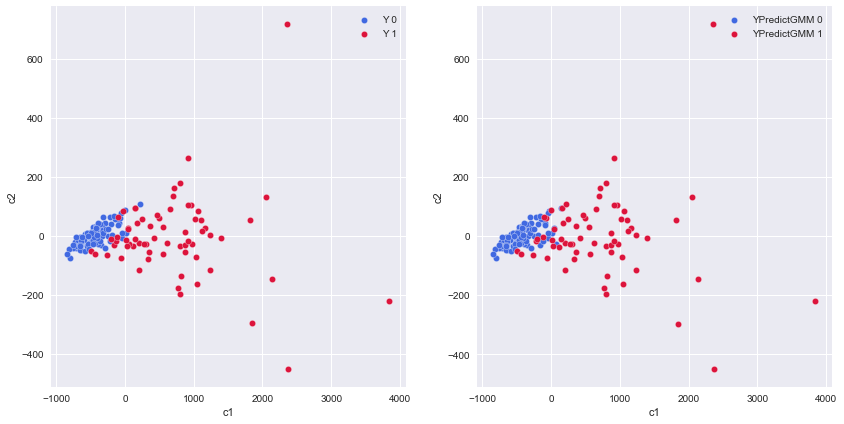

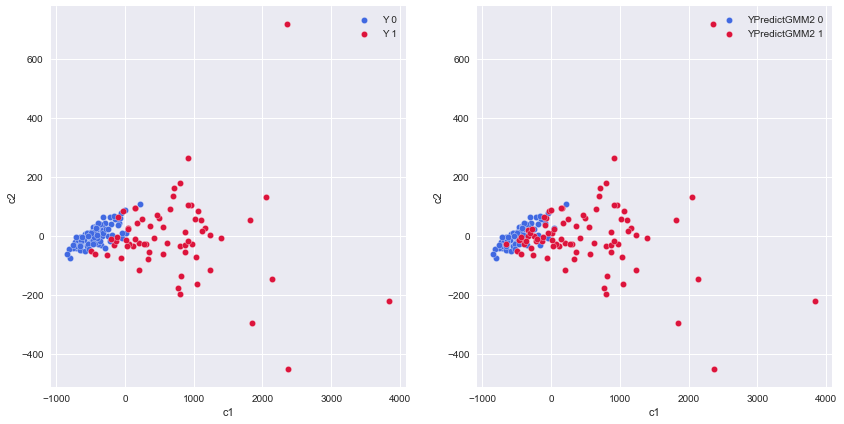

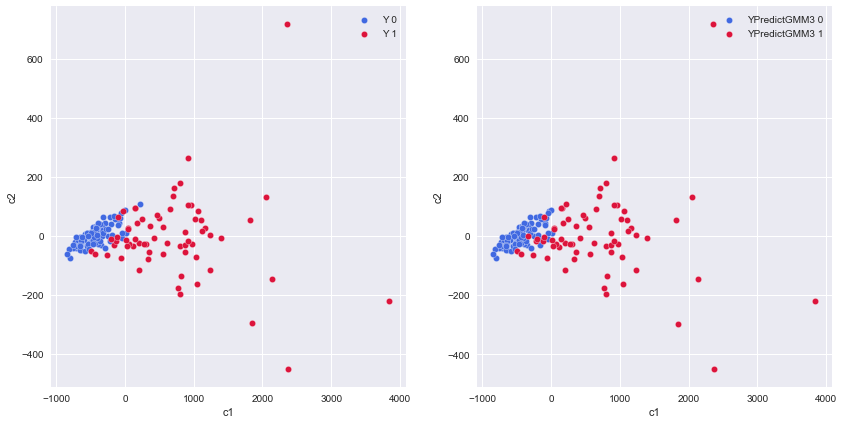

In [68]:
# GMM
pcaPlot(pcaData, "Y", "YPredictGMM")
pcaPlot(pcaData, "Y", "YPredictGMM2")
pcaPlot(pcaData, "Y", "YPredictGMM3")

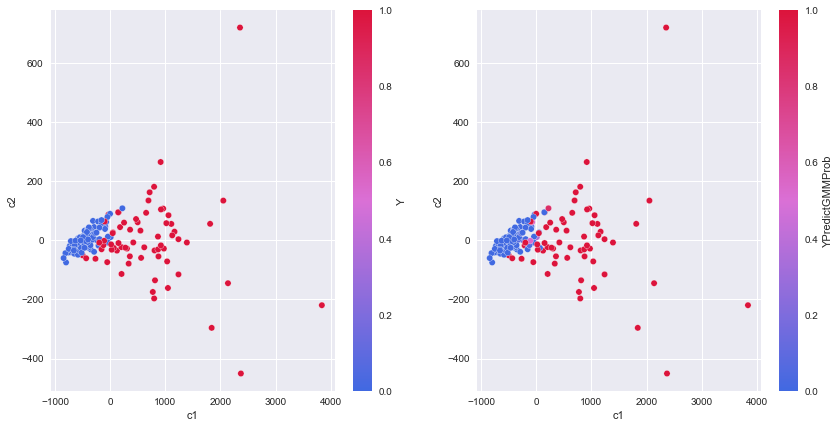

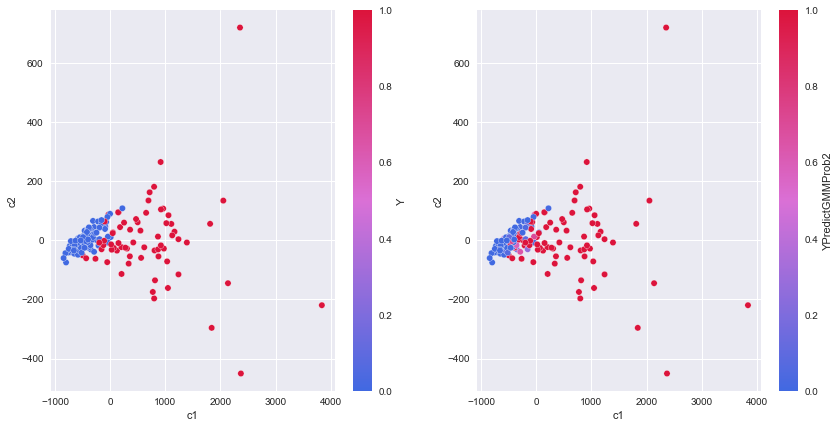

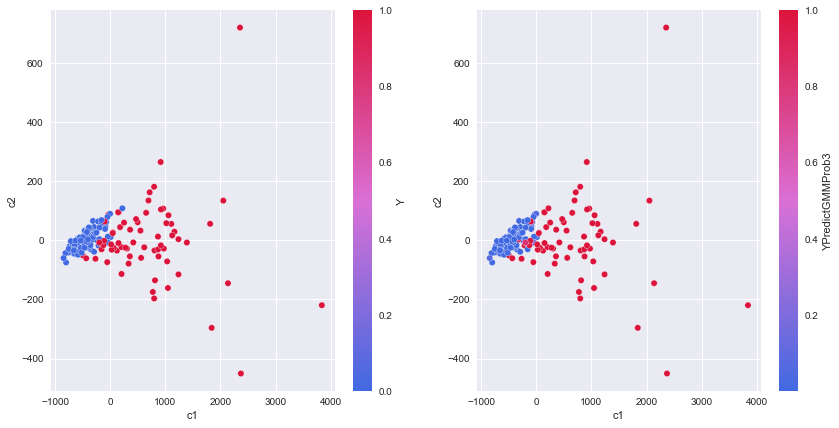

In [69]:
pcaPlotWithProb(pcaData, "Y", "YPredictGMMProb")
pcaPlotWithProb(pcaData, "Y", "YPredictGMMProb2")
pcaPlotWithProb(pcaData, "Y", "YPredictGMMProb3")

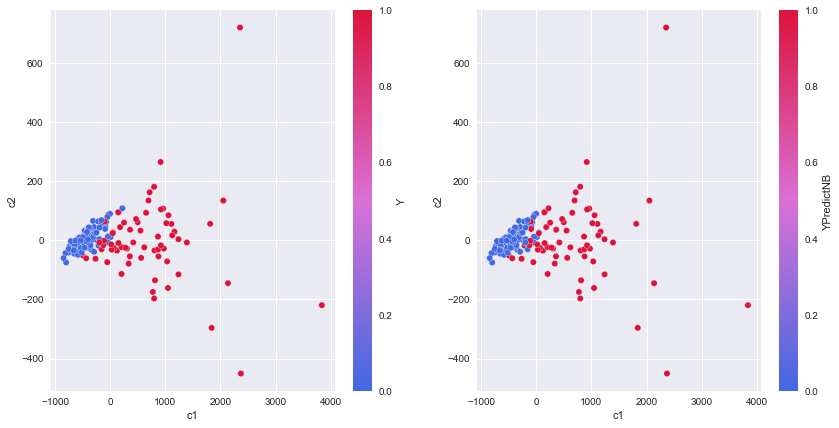

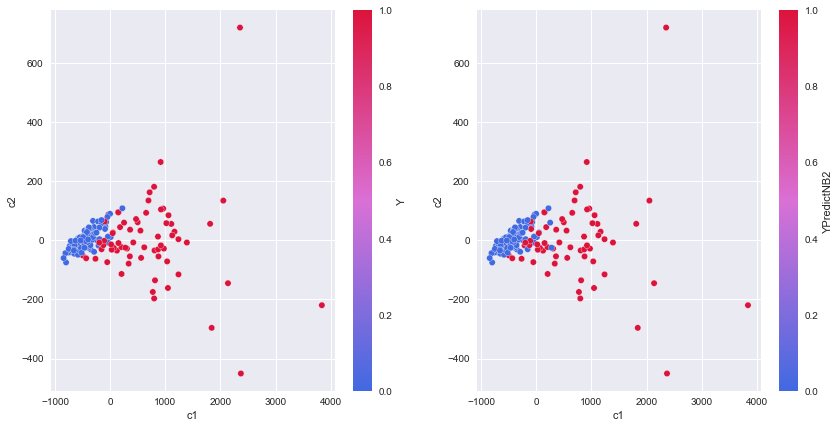

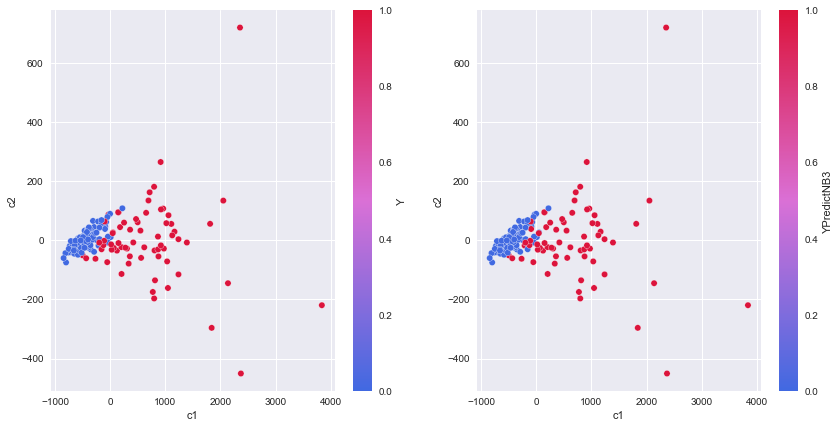

In [70]:
# NB
# pcaPlot(pcaData, "Y", "YPredictNB")
# pcaPlot(pcaData, "Y", "YPredictNB2")
# pcaPlot(pcaData, "Y", "YPredictNB3")
pcaPlotWithProb(pcaData, "Y", "YPredictNB")
pcaPlotWithProb(pcaData, "Y", "YPredictNB2")
pcaPlotWithProb(pcaData, "Y", "YPredictNB3")

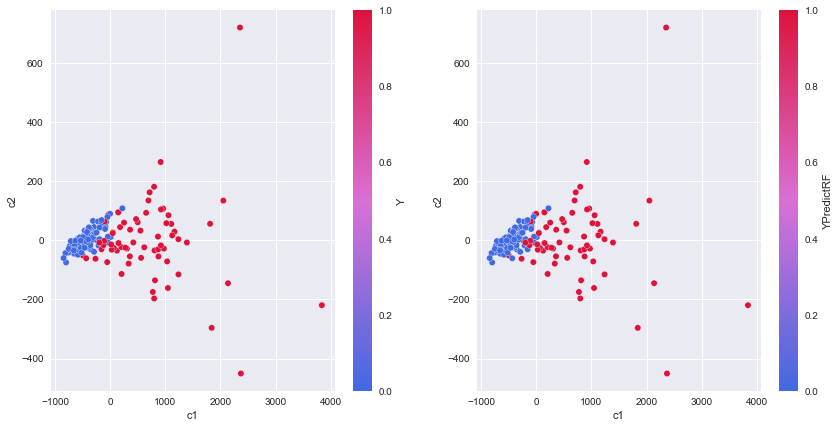

In [71]:
# random forest
pcaPlotWithProb(pcaData, "Y", "YPredictRF")

### Bagging of Models

In [85]:
# baggingData = pcaData.loc[:,["YPredictGMM", "YPredictNB", "YPredictRF"]]
# baggingData = pcaData.loc[:,["YPredictGMM2", "YPredictNB2", "YPredictRF2"]]
baggingData = pcaData.loc[:,["YPredictGMM3", "YPredictNB3", "YPredictRF3"]]
baggingSum = baggingData.sum(1)
baggingResult = baggingSum > 1
baggingResult = baggingResult.astype(int)

In [86]:
pcaData['YPredictBagging'] = baggingResult
pcaData.head(5)

,c1,c2,Y,YPredictGMM,YPredictGMM2,YPredictGMM3,YPredictGMMProb,YPredictGMMProb2,YPredictGMMProb3,YPredictNB,YPredictNB2,YPredictNB3,YPredictRF,YPredictBagging
0,179.659152,43.944801,1,1,1,1,1.000000e+00,1.000000,1.000000,1,1,1,1,1
1,-529.713512,-1.598021,0,0,0,0,4.183635e-09,0.012634,0.000003,0,0,0,0,0
2,304.651050,-28.464544,1,1,1,1,1.000000e+00,0.999988,1.000000,1,1,1,1,1
3,-293.463004,44.465648,0,0,0,0,7.085706e-11,0.023113,0.001451,0,0,0,0,0
4,1057.713346,84.137191,1,1,1,1,1.000000e+00,1.000000,1.000000,1,1,1,1,1


In [87]:
print ("Accuracy of bagging model on testing set is {0:.2f}."
       .format(metrics.accuracy_score(YTestNumerical, baggingResult)))

print("Confusion Matrix: {}".format(metrics.confusion_matrix(YTestNumerical, baggingResult)))   
print("Recall: {0:.2f}".format(metrics.recall_score(YTestNumerical, baggingResult)))

Accuracy of bagging model on testing set is 0.98.
Confusion Matrix: [[103   1]
 [  3  64]]
Recall: 0.96


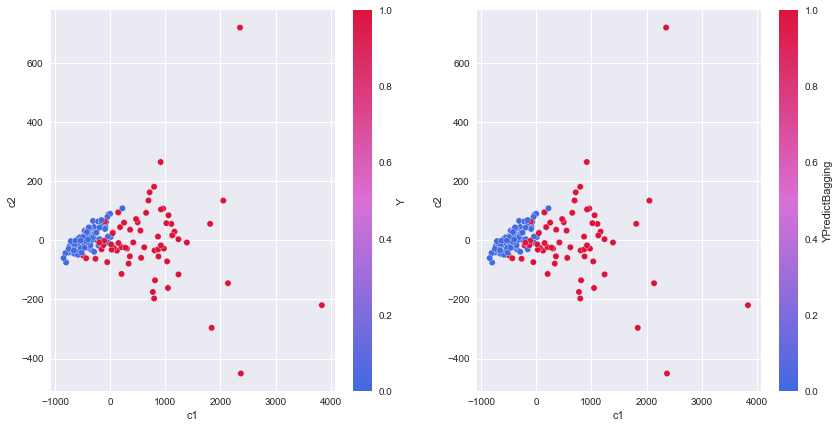

In [88]:
# bagging
pcaPlotWithProb(pcaData, "Y", "YPredictBagging")